# Discussion: Subset Selection, Ridge Regression, and the Lasso

So far, we implemented three approaches for restricting the linear regression model:
   * Ridge regression does a proportional shrinkage (soft-thresholding).
   * Lasso translates each coefficient by a constant factor $\lambda$, truncating at zero (soft-thresholding).
   * Best-subset selection drops all the variables with coefficients smaller than the $M^{th}$ largest (hard-thresholding).
   
In the case of orthonormal input matrix $\mathbf{X}$, the three procedures have explicit solutions. Each method applies a simple transformation to the least squares estime $\hat\beta_j$ as follows:

| Estimator | Formula |
| --- | --- |
| Best subset (size $M$ ) |  $$\hat\beta_j \cdot I(\|\hat\beta_j\| \geq \|\hat\beta_{(M)}\|)$$ |
| Ridge | $$\hat\beta_j / (1 +\lambda)$$ |
| Lasso | $$\text{sign}(\hat\beta_j)(\|\hat\beta_j\| - \lambda)_{+}$$ |

We can generalize ridge regression and the lasso, and view them as Bayes estimates. Consider the criterion:

$$\tilde\beta = \underset{\beta}{\text{argmin}} \left\{\sum_{i=1}^N (y_i -\beta_0 - \sum_{j=1}^p x_{ij}\beta{j})^2 + \lambda\sum_{j=1}^N |\beta_j|^q\right\}$$

for $q\geq 0$. 

Here, we try to plot the contours of the constant value of $\sum_j |\beta_j|^q$:

In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
b1_lin = np.linspace(-1, 1, 1000)
b2_lin = np.linspace(-1, 1, 1000)
b1, b2 = np.meshgrid(b1_lin, b2_lin)
b_12 = np.concatenate((b1.ravel().reshape(-1, 1), b2.ravel().reshape(-1, 1)), axis=1)

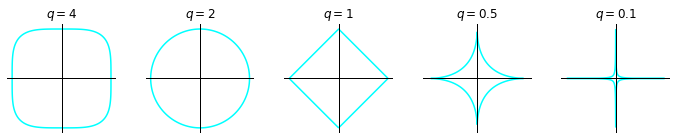

In [3]:
q = [0.1, 0.5, 1, 2, 4][::-1]
plt.figure(figsize=(12, 2))
for i, q_ in enumerate(q):
    c = np.zeros(len(b_12))
    for j, b12 in enumerate(b_12):
        c[j] = np.abs(b12[0]) ** q_ + np.abs(b12[1]) ** q_
    
    plt.subplot(1, 5, i+1, aspect='equal')
    plt.title("$q = $" + str(q_))
    plt.contour(b1, b2, c.reshape(b1.shape), levels=1, colors='cyan')
    plt.axhline(y=0, color='k', linewidth=1)
    plt.axvline(x=0, color='k', linewidth=1)
    plt.xlim([-1.1, 1.1])
    plt.ylim([-1.1, 1.1])
    plt.axis('off')
plt.show()

The above plot is the contours of constant value of $\sum_j |\beta_j|^q$ for given values of q for the cases of two inputs.

Considering the $|\beta_j|^q$ as the log-prior density for $\beta_j$, these are also the equi-contours of the prior distribution of the parameters.

  * The value $q=0$ corresponds to variable subset selection, as the penalty simpy counts the number of nonzero parameters.
  * The value $q=1$ corresponds to lasso.
  * The value $q=2$ corresponds to ridge regression.
  * The values $q\leq 1$ corresponds to prior that is not uniform in direction, but concentrates more mass in the coordinate directions.
  * The values $1 < q < 2$ suggests a compromise between the lasso and ridge regression. However, for $q>1$, $|\beta_j|^q$ is differentiable at 0. Therefore it does not shate the ability of lasso for setting coefficients exactly to 0.
  
There is a different compromise between ridge and the lasso: *Elastic Net* penalty, which is given as follows:

$$\lambda\sum_{j=1}^p (\alpha\beta_j^2 + (1 - \alpha)|\beta_j|))$$

Here, we implement the comparison between $L_q$ penalty with $q=1.2$ and the elastic net penalty with $\alpha=0.2$:

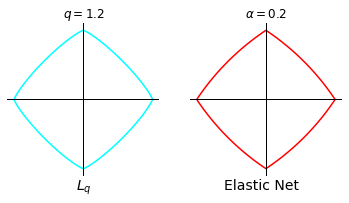

In [4]:
plt.figure(figsize=(6, 4))
c = np.zeros(len(b_12))
alpha = 0.2
q = 1.2

for j, b12 in enumerate(b_12):
    c[j] = np.abs(b12[0]) ** q + np.abs(b12[1]) ** q

plt.subplot(1, 2, 1, aspect='equal')
plt.title("$q = $" + str(q))
plt.contour(b1, b2, c.reshape(b1.shape), levels=1, colors='cyan')
plt.annotate("$L_q$", xy=(-0.1, -1.3), annotation_clip=False, fontsize=14)
plt.axhline(y=0, color='k', linewidth=1)
plt.axvline(x=0, color='k', linewidth=1)
plt.xlim([-1.1, 1.1])
plt.ylim([-1.1, 1.1])
plt.axis('off')

c = np.zeros(len(b_12))
for j, b12 in enumerate(b_12):
    c[j] = alpha * b12[0] ** 2 + (1 - alpha) * np.abs(b12[0]) + alpha * b12[1] ** 2 + (1 - alpha) * np.abs(b12[1])

plt.subplot(1, 2, 2, aspect='equal')
plt.title(r"$\alpha = $" + str(alpha))
plt.contour(b1, b2, c.reshape(b1.shape), levels=1, colors='red')
plt.annotate("Elastic Net", xy=(-0.6, -1.3), annotation_clip=False, fontsize=14)
plt.axhline(y=0, color='k', linewidth=1)
plt.axvline(x=0, color='k', linewidth=1)
plt.xlim([-1.1, 1.1])
plt.ylim([-1.1, 1.1])
plt.axis('off')
plt.show()

It is hard to detect the difference with a naked eye. However, the elastic-net has sharp (non-differentiable) corners, while the $q=1.2$ penalty does not.